In [1]:
!pip install geopandas descartes matplotlib seaborn pandas xlrd

     |████████████████████████████████| 1.0MB 7.0MB/s 
     |████████████████████████████████| 15.3MB 258kB/s 
     |████████████████████████████████| 6.5MB 40.6MB/s 


In [2]:
!wget https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.shp
!wget https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.shx
!wget https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.prj
!wget https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.cpg
!wget https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.dbf


--2021-04-30 15:37:25--  https://github.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/raw/master/gadm36_IND_shp/gadm36_IND_2.shp
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/master/gadm36_IND_shp/gadm36_IND_2.shp [following]
--2021-04-30 15:37:25--  https://raw.githubusercontent.com/yasersakkaf/Visualize-Women-Harrasment-in-India-using-GeoPandas/master/gadm36_IND_shp/gadm36_IND_2.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13389472 (13M) [application/octet-stream]
Saving to: ‘gadm36_IND_2.shp’

gadm3

In [3]:
import xlrd
import random
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [4]:
fp = "gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
# map_df.head()

In [5]:

map_df = map_df[['NAME_1', 'NAME_2', 'geometry']]
map_df = map_df[map_df['NAME_1']=='West Bengal']#.dropna()
# map_df.plot()
# plt.quiver()

In [6]:
import shapely
from shapely.geometry import Polygon, MultiPolygon
def extract_center(polygon):
    if isinstance(polygon,Polygon):
        x, y = polygon.exterior.coords.xy
        x, y = np.mean(x), np.mean(y)
    elif isinstance(polygon, MultiPolygon):
        points = [point.exterior.coords.xy for point in polygon]
        x, y = [point[0].tolist() for point in points], [point[1].tolist() for point in points]
        x, y = [j for i in x for j in i], [j for i in y for j in i]
        x, y = np.mean(x), np.mean(y)
    return x, y

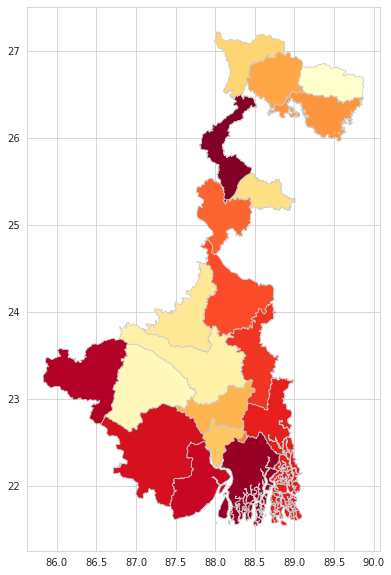

In [7]:
# x,y = map_df[map_df['NAME_2']=='Kolkata'].geometry.iloc[0].exterior.coords.xy
# x,y = np.mean(x), np.mean(y)
x,y = extract_center(map_df[map_df['NAME_2']=='Kolkata'].geometry.iloc[0])

# points = [point.exterior.coords.xy for point in map_df[map_df['NAME_2']=='Haora'].geometry.iloc[0]]
# x1, y1 = [point[0].tolist() for point in points], [point[1].tolist() for point in points]
# x1, y1 = [j for i in x1 for j in i], [j for i in y1 for j in i]
# x1, y1 = np.mean(x1), np.mean(y1)

x1,y1 = extract_center(map_df[map_df['NAME_2']=='Haora'].geometry.iloc[0])


# points = [point.exterior.coords.xy for point in map_df[map_df['NAME_2']=='North 24 Parganas'].geometry.iloc[0]]
# x2, y2 = [point[0].tolist() for point in points], [point[1].tolist() for point in points]
# x2, y2 = [j for i in x2 for j in i], [j for i in y2 for j in i]
# x2, y2 = np.mean(x2), np.mean(y2)
x2,y2 = extract_center(map_df[map_df['NAME_2']=='North 24 Parganas'].geometry.iloc[0])

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax = map_df.plot(ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8',legend=True)
# ax.quiver([x,x],[y,y],[x1-x,x2-x],[y1-y,y2-y])


# x1, y1 = map_df[map_df['NAME_2']=='Haora'].geometry.iloc[0].exterior.coords.xy
# x1, y1 = np.mean(x1), np.mean(y1)

In [8]:
cases = pd.read_csv("/content/district_mobility_cases.csv")
cases.loc[:,'Date'] = pd.to_datetime(cases.Date)
wb_cases = cases[cases['State']=='West Bengal']
wb_cases.loc[:,'Date'] = (wb_cases.Date - wb_cases.Date.min()).astype('timedelta64[D]')
wb_cases = wb_cases[['District','Confirmed','Date']]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


122546     0.0
122547     0.0
122548     0.0
122549     1.0
122550     0.0
          ... 
181653    50.0
181654    26.0
181655    73.0
181656    78.0
181657    80.0
Name: Confirmed, Length: 6198, dtype: float64

In [9]:
# x1
map_df.columns = ['State','District','geometry']
map_df['District'] = map_df['District'].replace(['Haora','Hugli','Darjiling','Maldah','Puruliya'],['Howrah','Hooghly','Darjeeling','Malda','Purulia'])

In [ ]:
set(wb_cases.District.unique())

array(['Alipurduar', 'Bankura', 'Birbhum', 'Cooch Behar',
       'Dakshin Dinajpur', 'Darjeeling', 'Hooghly', 'Howrah',
       'Jalpaiguri', 'Kolkata', 'Malda', 'Murshidabad', 'Nadia',
       'North 24 Parganas', 'Purba Medinipur', 'Purulia',
       'South 24 Parganas', 'Uttar Dinajpur'], dtype=object)

In [ ]:
set(wb_cases.District.unique()) - set(map_df['NAME_2'].values)

{'Cooch Behar', 'Darjeeling', 'Hooghly', 'Howrah', 'Malda', 'Purulia'}

In [ ]:
set(map_df['District'].values) - set(wb_cases.District.unique()) 

{'Barddhaman', 'Koch Bihar', 'Pashchim Medinipur'}

In [10]:
date = 353.
# map_df['Cases'] = wb_cases[wb_cases.Date == date]
cases_with_locations = pd.merge(map_df, wb_cases[wb_cases.Date == date], on=['District'])
# cases_with_locations.plot()

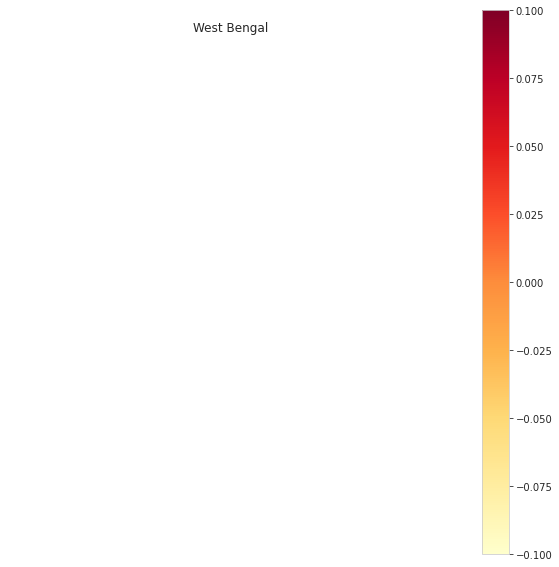

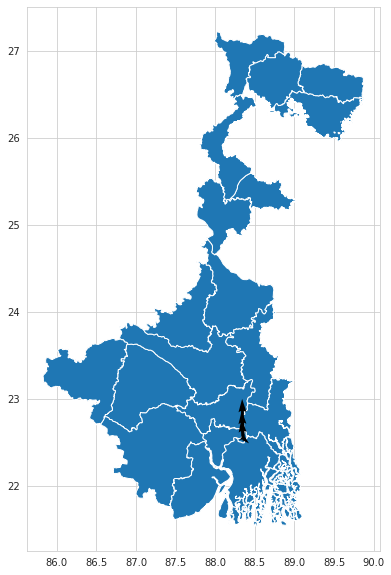

In [29]:
cases_with_locations = gpd.GeoDataFrame(
    cases_with_locations, geometry='geometry')[['District','geometry','Confirmed']]

cases_with_locations['Confirmed'] = np.log(cases_with_locations['Confirmed'])
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.axis('off')

ax.set_title("West Bengal")

ax = cases_with_locations.plot(column='Confirmed',ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8',legend=True)

x,y = extract_center(map_df[map_df['District']=='Kolkata'].geometry.iloc[0])

xs, ys = [], []
for d in causal:
    xt, yt = extract_center(map_df[map_df['District']==d].geometry.iloc[0])
    xs.append(xt-x)
    ys.append(yt-y)

xs, ys = np.asarray(xs), np.asarray(ys)
# x1,y1 = extract_center(map_df[map_df['District']=='Howrah'].geometry.iloc[0])
# x2,y2 = extract_center(map_df[map_df['District']=='North 24 Parganas'].geometry.iloc[0])

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax = map_df.plot(ax=ax)
# ax = map_df.plot(ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='0.8',legend=True)
ax.quiver([x]*len(causal),[y]*len(causal),xs,ys)

# plt.show()


In [25]:
map_df['District'].values

array(['Alipurduar', 'Bankura', 'Barddhaman', 'Birbhum',
       'Dakshin Dinajpur', 'Darjeeling', 'Howrah', 'Hooghly',
       'Jalpaiguri', 'Koch Bihar', 'Kolkata', 'Malda', 'Murshidabad',
       'Nadia', 'North 24 Parganas', 'Pashchim Medinipur',
       'Purba Medinipur', 'Purulia', 'South 24 Parganas',
       'Uttar Dinajpur'], dtype=object)

In [27]:
causal = ['Howrah','Malda','North 24 Parganas','Uttar Dinajpur','Murshidabad']

In [30]:
xs

array([-0.35861433, -0.12498316,  0.52593746, -0.09152788, -0.15271753])